In [1]:
from src.data import extract_vault, holdout
import matplotlib.pyplot as plt 
import networkx as nx
import numpy as np
from src.model_base import calculate_adamic_adar, create_pairs_for_nodes, generate_recomendations
from tqdm import tqdm
from copy import deepcopy
import pandas as pd
from src.metrics import recall_n

In [2]:
vault = extract_vault('./vaultes/obsidian-hub/')
vault_graph = deepcopy(vault.graph)

Front matter not populated for T - Thecookiemomma's Daily Log.md: ParserError('while parsing a block mapping', <yaml._yaml.Mark object at 0x7f225f2dee00>, 'did not find expected key', <yaml._yaml.Mark object at 0x7f225f2dee50>)
Front matter not populated for T - Thecookiemomma's Daily Log.md: ParserError('while parsing a block mapping', <yaml._yaml.Mark object at 0x7f225ee4a900>, 'did not find expected key', <yaml._yaml.Mark object at 0x7f225ee4aa90>)
Front matter not populated for kepano.md: ScannerError('while scanning for the next token', <yaml._yaml.Mark object at 0x7f225edca8b0>, 'found character that cannot start any token', <yaml._yaml.Mark object at 0x7f225edcaf90>)
Front matter not populated for kepano.md: ScannerError('while scanning for the next token', <yaml._yaml.Mark object at 0x7f225f5c3770>, 'found character that cannot start any token', <yaml._yaml.Mark object at 0x7f225f5c3310>)
Front matter not populated for gavinmn.md: ScannerError('while scanning for the next token

## Baseline prediction and scoring

In [3]:
train_graph, holdout_links = holdout(vault.graph, seed=42, alpha=0.1)
sum([hl in train_graph.edges for hl in holdout_links])

141

In [4]:
# for hl in holdout_links:
#     print(hl[0])

In [6]:
holdout_nodes = [hl[0] for hl in holdout_links]
pairs = create_pairs_for_nodes(nodes=holdout_nodes, graph=train_graph, tqdm_disable=False)
scores = calculate_adamic_adar(graph=train_graph, pair_nodes=pairs).groupby('node_from').agg(lambda x: list(x))

 51%|█████     | 519/1023 [00:28<00:27, 18.15it/s]


KeyboardInterrupt: 

In [ ]:
recs = generate_recomendations(scores)

In [ ]:
# recs

,recomendations
note_id,
1 directional annotations,"[add notes to explorer, Obsidian, Obsidian imp..."
BEM naming convention,"[CSS collapse heading, subsequent-sibling comb..."
Create a site with mkdocs,"[Component Object Model, Obsidian Web - Chrome..."
Hypothesis review,"[Obsidian, Obsidian private comments, add note..."
Obsidian improvements,"[plugin ideas for Obsidian, Obsidian, 1 direct..."
Obsidian private comments,"[add notes to explorer, add notes to explorer,..."
hashtag synonyms,"[redirect for notes, setup Obsidian Git, Obsid..."
interwikilinks plugin,"[wikilinks, obsidian web integration, Obsidian..."
learn technical art,"[build a portfolio, TA brings value to the tea..."


In [ ]:
import pandas as pd
holdout_links_df = pd.DataFrame.from_records(holdout_links, columns=['note_id', 'notes_to', 'p']).groupby('note_id').agg(lambda x: list(x))[['notes_to']]

In [ ]:
# holdout_links_df

,notes_to
note_id,
1 directional annotations,[save quotes n lines]
BEM naming convention,[A Philosophy of Software Design]
Create a site with mkdocs,[Obsidian]
Hypothesis review,[annotate websites]
Obsidian improvements,[Obsidian]
Obsidian private comments,"[Obsidian private comments-1673286147963.jpeg,..."
hashtag synonyms,[wikilinks]
interwikilinks plugin,[Wikipedia:Main Page]
learn technical art,[goal driven learning]


In [ ]:
from src.metrics import recall_n

In [ ]:
recall_n(recs=recs, holdout_links=holdout_links_df, topn=10)

0.25

## Evaluate on different splittings

In [3]:
graph = vault.graph

recall = []
for _ in tqdm(range(100)):
    train_graph, holdout_links = holdout(graph, seed=None, alpha=0.1)
    sum([hl in train_graph.edges for hl in holdout_links])

    holdout_nodes = [hl[0] for hl in holdout_links]
    pairs = create_pairs_for_nodes(nodes=holdout_nodes, graph=train_graph)
    scores = calculate_adamic_adar(graph=train_graph, pair_nodes=pairs).groupby('node_from').agg(lambda x: list(x))

    recs = generate_recomendations(scores)

    holdout_links_df = pd.DataFrame.from_records(holdout_links, columns=['note_id', 'notes_to', 'p']).groupby('note_id').agg(lambda x: list(x))[['notes_to']]

    recall.append(recall_n(recs=recs, holdout_links=holdout_links_df, topn=5))

100%|██████████| 100/100 [00:02<00:00, 37.57it/s]


In [4]:
np.mean(recall)

0.19869949494949496

In [6]:
recall

[0.05,
 0.15384615384615385,
 0.22727272727272727,
 0.13333333333333333,
 0.16666666666666666,
 0.25,
 0.16666666666666666,
 0.3333333333333333,
 0.25,
 0.25,
 0.3055555555555556,
 0.15384615384615385,
 0.23076923076923078,
 0.09090909090909091,
 0.16666666666666666,
 0.3076923076923077,
 0.0,
 0.045454545454545456,
 0.2727272727272727,
 0.045454545454545456,
 0.18181818181818182,
 0.13636363636363635,
 0.22727272727272727,
 0.25,
 0.2,
 0.0,
 0.08333333333333333,
 0.3333333333333333,
 0.3076923076923077,
 0.2222222222222222,
 0.3333333333333333,
 0.09090909090909091,
 0.18181818181818182,
 0.25,
 0.5,
 0.18181818181818182,
 0.08333333333333333,
 0.3888888888888889,
 0.125,
 0.15384615384615385,
 0.2727272727272727,
 0.18181818181818182,
 0.16666666666666666,
 0.25,
 0.20833333333333334,
 0.3076923076923077,
 0.08333333333333333,
 0.2,
 0.18181818181818182,
 0.08333333333333333,
 0.2,
 0.3076923076923077,
 0.36363636363636365,
 0.23333333333333334,
 0.3181818181818182,
 0.2272727272727

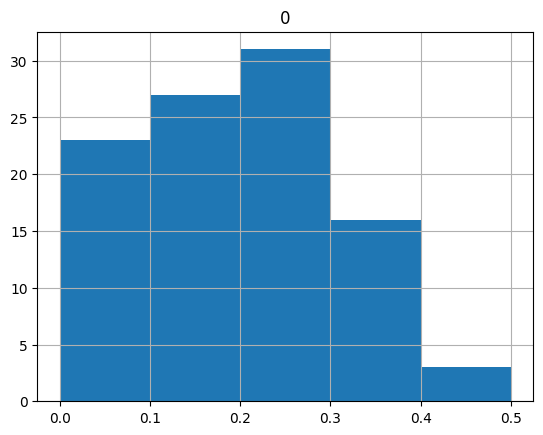

In [11]:
hist = pd.DataFrame(recall).hist(bins=5)